In [823]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.linear_model import Lasso,LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

# Grabbing and Preparation of the dataset

In [774]:
# The dataset is read from the csv file
data=pd.read_csv('modified_data.csv')

In [775]:
# Printing the first 5 values of our data 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [776]:
# Checking the number of rows and columns 
data.shape

(1460, 77)

# Prepare the dataset for training

In [777]:
# Drop the 'Id' column since we it is just a label and we do not need during training
data.drop('Id',axis=1,inplace=True)

In [778]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Filling Missing Values

In [779]:
# Checking if there exists columns with missing values
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [780]:
# All features contained in the data are placed in a list
original_features=list(data.columns)
original_features
len(original_features)

76

In [781]:
# Checking the columns containing missing values
data.columns[data.isna().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [782]:
# Features with missing values are placed in a list
features_with_missing=list(data.columns[data.isna().any()])
features_with_missing
len(features_with_missing)

15

In [783]:
# The result shows the percentage of missing values for the LotFrontage column
data['LotFrontage'].isna().sum() / len(data) * 100

17.73972602739726

In [784]:
# Looping through the list of missing features to find percentages of missing values in the features
for feature in features_with_missing:
  print(feature,' ',(data[feature].isna().sum())/len(data)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [785]:
# Dropping any features with more than half of the missing values
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)

In [786]:
# The result shows that none of the columns is dropped. No column meets the threshold of having more than half of the total rows as missing.
data.shape

(1460, 76)

In [787]:
# mean fill - fill all the null values with mean.
mean_fill=['LotFrontage','MasVnrArea']

# bfill - used to backward fill the missing values in the dataset
bfill=['FireplaceQu']

# ffil - replaces the NULL values with the value from the previous row
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))

In [788]:
# Loop through features that are to be mean filled and mean fill them
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [789]:
# Loop through features that are to be backward filled and backward fill them
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)

In [790]:
# Loop through features that are to be forward filled and forward fill them
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [791]:
# Check again to see if any features still contains missing values
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

# Encoding the Dataset

In [792]:
# Checking datatypes of the features
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [793]:
# Placing categorical data in a list
# categorical variable is a variable type with two or more categories
categorical_data=data.select_dtypes(include=['object']).copy()
categorical_data.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [794]:
cat_features=list(categorical_data.columns)

In [795]:
original_features = list(data.columns)

In [796]:
# Separating data into nominal, ordinal and numerical

# Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']

# Ordinal data is a kind of categorical data with a set order or scale to it.
ordinal=list(set(cat_features)-set(nominal))

# Numerical data is a data type expressed in numbers, rather than natural language description. 
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice']

In [797]:
# The target feature is SalePrice
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [798]:
# Encoding categorical data - 'HouseStyle' feature
data['HouseStyle'].astype('category').cat.codes

0       5
1       2
2       5
3       5
4       5
       ..
1455    5
1456    2
1457    5
1458    2
1459    2
Length: 1460, dtype: int8

In [799]:
# Looping through ordinal features and encoding them
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [800]:
df_nominal=pd.get_dummies(data[nominal])

In [801]:
# Assigning ordinal data to df_ordinal
df_ordinal=data[ordinal]

In [802]:
# Assigning numerical data to df_numerical
df_numerical=data[numerical]

In [803]:
# Concatenating encoded data into one
encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)

In [804]:
encoded_data.head(3)

,BsmtFullBath,TotRmsAbvGrd,BedroomAbvGr,YearRemodAdd,MSSubClass,GarageYrBlt,LowQualFinSF,LotArea,BsmtHalfBath,EnclosedPorch,...,FireplaceQu,SaleCondition,Utilities,HeatingQC,PavedDrive,ExterQual,Electrical,Condition1,SaleType,Exterior1st
0,1,8,3,2003,60,2003.0,0,8450,0,0,...,4,4,0,0,2,2,4,2,8,12
1,0,6,3,1976,20,1976.0,0,9600,1,0,...,4,4,0,0,2,3,4,1,8,8
2,1,6,3,2002,60,2001.0,0,11250,0,0,...,4,4,0,0,2,2,4,2,8,12


In [805]:
encoded_data.shape

(1460, 111)

# Standardizing the dataset
Standardization/Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 

In [806]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [807]:
# Dropping the target feature to remain with the rest if the features
X=encoded_data.drop('SalePrice',axis=1)

In [808]:
y = data[target]

In [809]:
# Converting data values to numpy
X=X.to_numpy()
y=y.to_numpy()

In [810]:
X.shape

(1460, 110)

In [811]:
y.shape

(1460, 1)

In [812]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [813]:
X_original = X
X_original.shape

(1460, 110)

In [814]:
X.shape

(1460, 110)

# Dimensionality Reduction using PCA
Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [815]:
pca=PCA(n_components=2)
p_components=pca.fit_transform(X)

In [816]:
pca.explained_variance_ratio_

array([0.10207313, 0.04345606])

# Visualizing the New Dataset

In [817]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.408534,-1.331099,0.347273
1,0.431961,2.623115,0.007288
2,2.828443,-0.855723,0.536154
3,-1.364219,0.552099,-0.515281
4,5.311985,-0.223232,0.869843
...,...,...,...
1455,1.306604,-2.289292,-0.074560
1456,1.095837,3.178227,0.366161
1457,1.259883,-0.867030,1.077611
1458,-2.830658,3.181632,-0.488523


In [818]:
X=p_components

# Training a Single Model

In [819]:
regressor=LassoCV()

In [820]:
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [821]:
regressor.coef_

array([0.25351581, 0.01757783])

In [822]:
regressor.intercept_

6.125891387076092e-17

# Plane of Best Fit - After feature extraction

In [824]:
final_data_array=final_data.to_numpy()

In [825]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [826]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [827]:
w_2

0.01757782919320572

Text(0.5, 0.92, 'Plane of Best Fit')

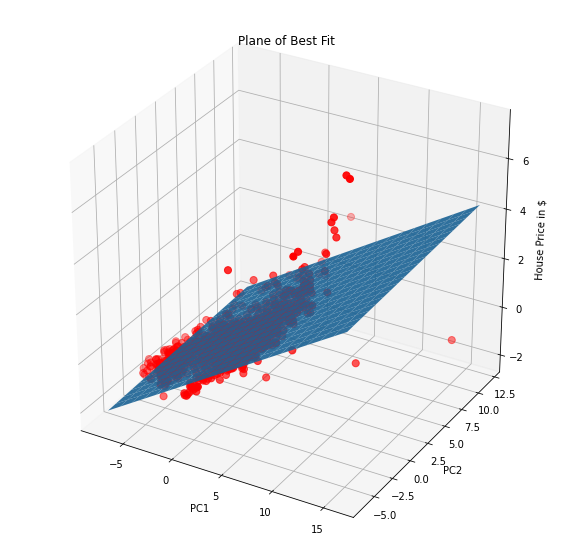

In [828]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")

# Feature Selection using L1

In [829]:
X = encoded_data.drop('SalePrice', 1)
y = encoded_data['SalePrice']
regressor = LassoCV()
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


LassoCV()

In [830]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

\

L1 selected only  11  features out of  110  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

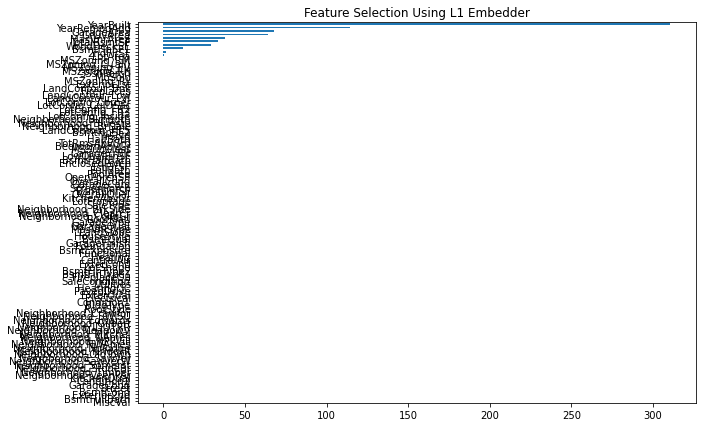

In [831]:
coef_col = pd.Series(regressor.coef_, index=X.columns)

sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

In [832]:
# The result shows the selected features by L1
c = pd.DataFrame(coef_col)
selected_features = list((c.loc[c[0] != 0]).index)
selected_features

['YearRemodAdd',
 'LotArea',
 'GarageArea',
 'BsmtFinSF1',
 'WoodDeckSF',
 'MasVnrArea',
 'YearBuilt',
 '2ndFlrSF',
 'MiscVal',
 'TotalBsmtSF',
 'GrLivArea']

### Feature Extraction using PCA, after feature selection using L1

In [833]:
X = X.to_numpy()
y = y.to_numpy()

In [834]:
target = 'SalePrice'
y = pd.DataFrame(data[target])

In [835]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

In [836]:
pca2 = PCA(n_components=2)
p_components_2=pca2.fit_transform(X)

In [837]:
X= p_components_2

In [838]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

### Training model after feature selection and feature extraction




In [839]:
regressor = LassoCV()
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [840]:
regressor.coef_

array([0.25351581, 0.01757801])

In [841]:
regressor.intercept_

5.670354495555678e-17

### Plane of Best Fit - After feature selection and extraction

In [842]:
pca_data_2 = pd.DataFrame(p_components_2,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
fin_data = pd.concat([pca_data_2,target_data],axis=1)
fin_data

,PC1,PC2,SalePrice
0,2.408534,-1.329820,0.347273
1,0.431962,2.621926,0.007288
2,2.828443,-0.855238,0.536154
3,-1.364216,0.550925,-0.515281
4,5.311986,-0.223470,0.869843
...,...,...,...
1455,1.306603,-2.289740,-0.074560
1456,1.095835,3.179431,0.366161
1457,1.259882,-0.865369,1.077611
1458,-2.830657,3.182247,-0.488523


In [843]:
fin_data_array = fin_data.to_numpy()

In [844]:
min_val = np.min(fin_data_array, axis=0)
max_val = np.max(fin_data_array, axis=0)
X_plot, Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [845]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [846]:
w_2

0.01757801243890026

Text(0.5, 0.92, 'Plane of Best Fit')

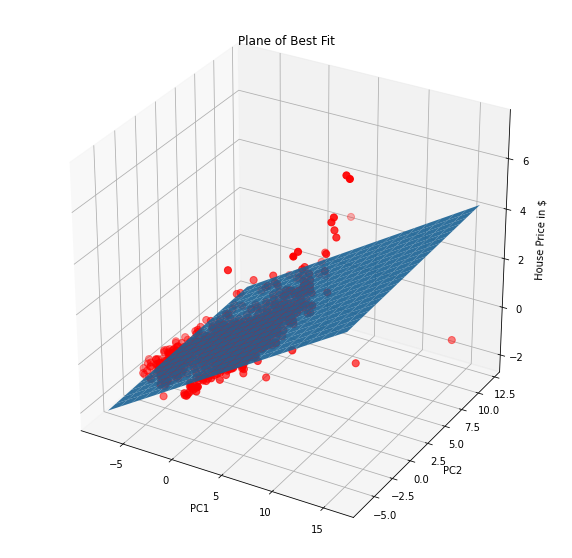

In [847]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(fin_data_array[:,0], fin_data_array[:,1], fin_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")